# Project - Music Recommender
## Marko Znamenacek

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
from tqdm import tqdm
sns.set()
%matplotlib inline

In [144]:
raw_dataset = pd.read_csv('/Users/marko/Documents/ZŠEM/Capstone/tracks_features.csv')
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [129]:
raw_dataset.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


### Editing database

In [145]:
df = raw_dataset.drop(columns=['id', 'album', 'album_id', 'artist_ids', 'track_number', 
                               'disc_number', 'time_signature', 'release_date'])
df.corr()

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
explicit,1.000000,0.194316,0.162870,0.007292,0.163154,-0.053346,0.336887,-0.182155,-0.161286,0.042840,0.056823,0.006945,-0.068231,0.143526
danceability,0.194316,1.000000,0.283016,0.018633,0.378194,-0.021528,0.209859,-0.285750,-0.285331,-0.044328,0.563436,0.060590,-0.135413,0.069507
energy,0.162870,0.283016,1.000000,0.034452,0.817934,-0.035788,0.130813,-0.796242,-0.252131,0.213494,0.399531,0.268231,-0.037603,0.144009
key,0.007292,0.018633,0.034452,1.000000,0.021622,-0.153902,0.022998,-0.027901,-0.014915,0.004419,0.024834,0.006202,-0.005822,0.003915
loudness,0.163154,0.378194,0.817934,0.021622,1.000000,0.000456,0.062403,-0.671553,-0.393037,0.138123,0.385005,0.246248,-0.051889,0.172585
mode,-0.053346,-0.021528,-0.035788,-0.153902,0.000456,1.000000,-0.046527,0.046134,-0.045574,0.012879,0.039026,0.013946,-0.028679,-0.054670
speechiness,0.336887,0.209859,0.130813,0.022998,0.062403,-0.046527,1.000000,-0.082375,-0.167551,0.189012,0.099680,0.007745,-0.078870,0.058225
acousticness,-0.182155,-0.285750,-0.796242,-0.027901,-0.671553,0.046134,-0.082375,1.000000,0.244132,-0.115001,-0.268836,-0.231021,0.002517,-0.151550
instrumentalness,-0.161286,-0.285331,-0.252131,-0.014915,-0.393037,-0.045574,-0.167551,0.244132,1.000000,-0.118987,-0.284707,-0.071455,0.121323,-0.007839
liveness,0.042840,-0.044328,0.213494,0.004419,0.138123,0.012879,0.189012,-0.115001,-0.118987,1.000000,0.062662,0.030149,0.005906,-0.015360


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   name              1204025 non-null  object 
 1   artists           1204025 non-null  object 
 2   explicit          1204025 non-null  bool   
 3   danceability      1204025 non-null  float64
 4   energy            1204025 non-null  float64
 5   key               1204025 non-null  int64  
 6   loudness          1204025 non-null  float64
 7   mode              1204025 non-null  int64  
 8   speechiness       1204025 non-null  float64
 9   acousticness      1204025 non-null  float64
 10  instrumentalness  1204025 non-null  float64
 11  liveness          1204025 non-null  float64
 12  valence           1204025 non-null  float64
 13  tempo             1204025 non-null  float64
 14  duration_ms       1204025 non-null  int64  
 15  year              1204025 non-null  int64  
dtype

In [147]:
df.head()

,name,artists,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,Testify,['Rage Against The Machine'],False,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,1999
1,Guerrilla Radio,['Rage Against The Machine'],True,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,1999
2,Calm Like a Bomb,['Rage Against The Machine'],False,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,1999
3,Mic Check,['Rage Against The Machine'],True,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,1999
4,Sleep Now In the Fire,['Rage Against The Machine'],False,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,1999


### All data plotted

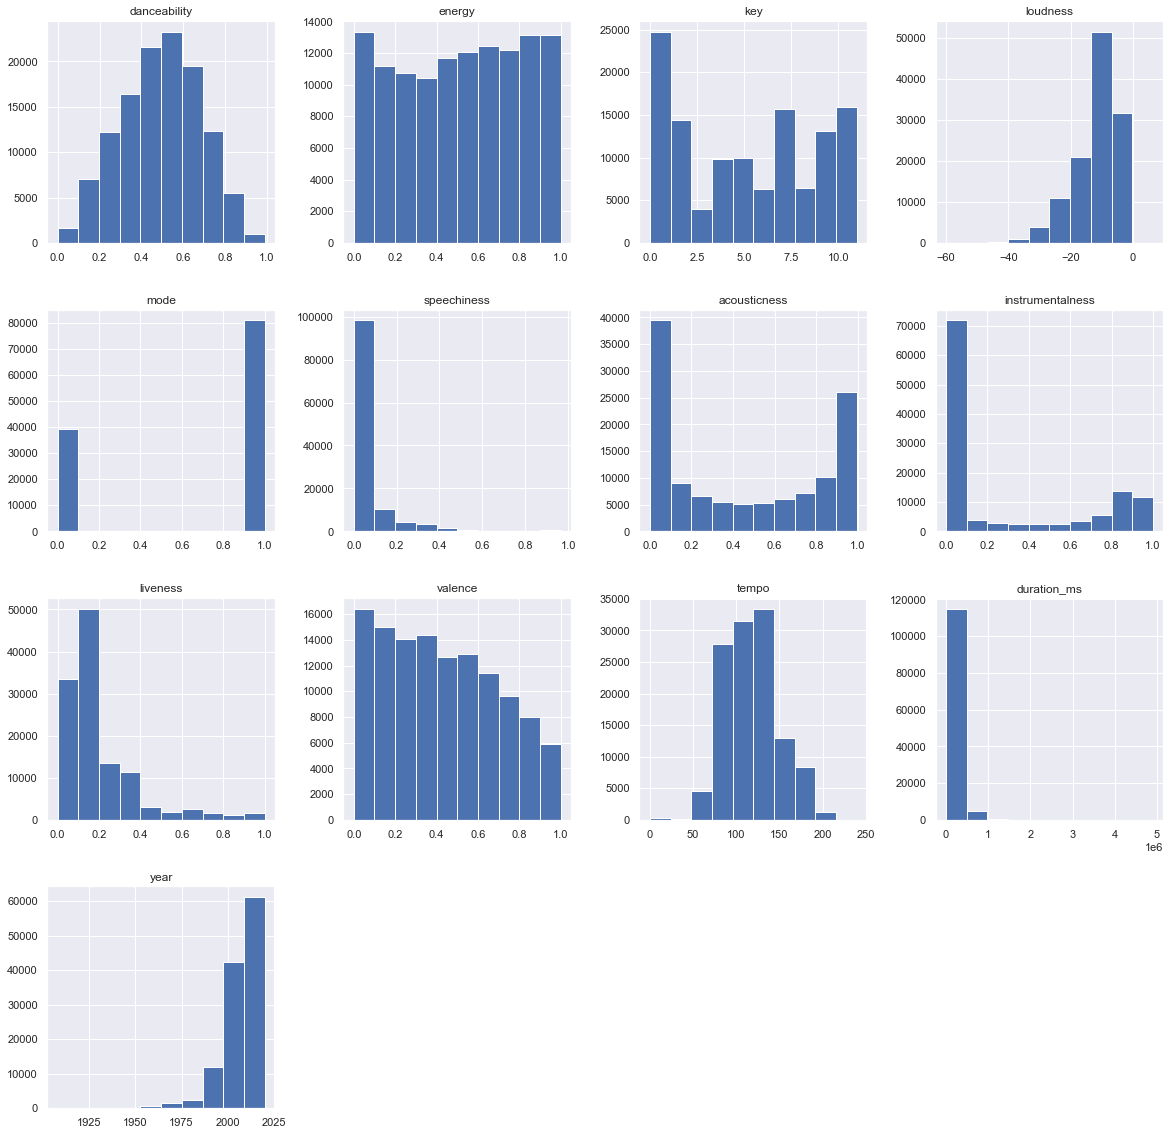

In [148]:
df = df.sample(frac=0.1, random_state = 1)
 
df.hist(figsize = (20, 20))
plt.show()

### Clustering

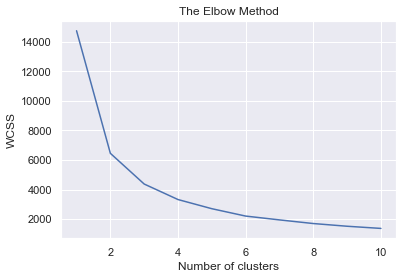

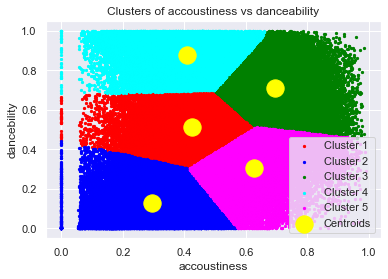

In [149]:
X = df.iloc[:, [3,4]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 5, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of accoustiness vs danceability')
plt.xlabel('accoustiness')
plt.ylabel('dancebility')
plt.legend()
plt.show()

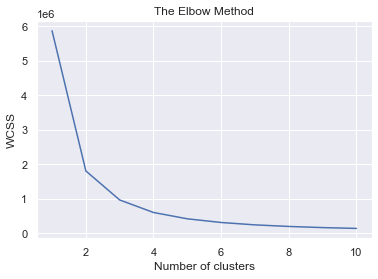

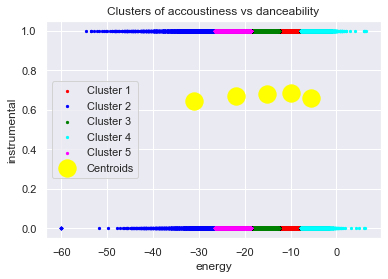

In [150]:
X = df.iloc[:, [6,7]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 5, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of accoustiness vs danceability')
plt.xlabel('energy')
plt.ylabel('instrumental')
plt.legend()
plt.show()

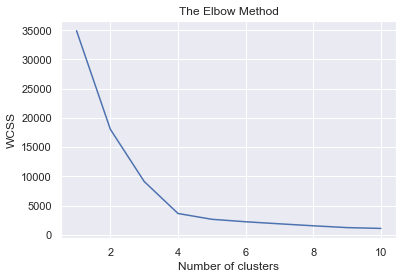

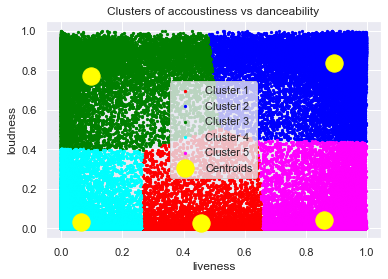

In [151]:
X = df.iloc[:, [9,10]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 5, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of accoustiness vs danceability')
plt.xlabel('liveness')
plt.ylabel('loudness')
plt.legend()
plt.show()

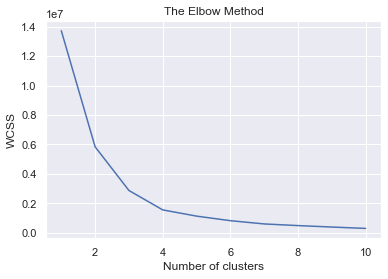

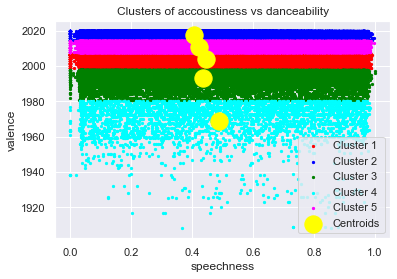

In [152]:
X = df.iloc[:, [12,15]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 5, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of accoustiness vs danceability')
plt.xlabel('speechness')
plt.ylabel('valence')
plt.legend()
plt.show()

### Recommending a song

In [170]:
from sklearn.preprocessing import MinMaxScaler
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = df.select_dtypes(include=datatypes)
for col in normarization.columns:
    MinMaxScaler(col)

In [171]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
features = kmeans.fit_predict(normarization)
df['features'] = features
MinMaxScaler(df['features'])

MinMaxScaler(feature_range=55897      0
215062     7
70429      9
103209     5
679327     3
          ..
612133     3
1078202    0
215488     0
223863     3
1110772    0
Name: features, Length: 120402, dtype: int32)

In [178]:
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = df
    def recommend(self, songs, amount=1):
        distance = []
        song = self.dataset[(self.dataset.name.str.lower() == songs.lower())].head(1).values[0]
        rec = self.dataset[self.dataset.name.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 1, 15]:
                    d = d + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(d)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['name','artists']
        return rec[columns][:amount]

recommendations = Spotify_Recommendation(df)
recommendations.recommend("Mockingbird", 10)

100%|████████████████████████████████| 120401/120401 [00:05<00:00, 23613.86it/s]
/var/folders/b3/tpmdkjfd6gd_911xs1hdgh1c0000gn/T/ipykernel_91867/1154558510.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['distance'] = distance


,name,artists
228724,Quicksand,['Warrant']
340836,Too Late Tonight - Remix By Chris Lord-Alge,['Arid']
173615,Cathedrals,['Gregory Douglass']
92643,My Woman Is An Old Black Spider,['Mississippi Heat']
804862,Whoregasm,['cupcakKe']
85566,Feuer auf dem Dach,['Atomik Harmonik']
366689,A Beer and a Shot,"['Juliana Hatfield', 'Frank Smith']"
1007359,River and Dale,['Chuck Ragan']
217522,Till the World Ends,['Britney Spears']
715893,Du kannst zaubern,['Roger Whittaker']
